## Different hierarchical composing ideas

In [1]:
from matplotlib import pyplot as plt
from numpy.random import randn
%matplotlib inline
import numpy as np
from skimage import color

import sys
sys.path.append("..")
from contour_visualization import color_blending_operator
from contour_visualization import color_converter
from contour_visualization import color_operations
from contour_visualization import color_schemes
from contour_visualization import picture_contours
from contour_visualization import helper
from contour_visualization import Gaussian

from contour_visualization import hierarchic_blending_operator

15:58:22.661 WARNING :: Using NumPy C-API based implementation for BLAS functions.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
size = 1000

mu_x_1 = 0
mu_y_1 = 0
mu_variance_x_1 = 3
mu_variance_y_1 = 15
gaussian_1 = ([mu_x_1,mu_y_1],[[mu_variance_x_1,0],[0,mu_variance_y_1]])
mu_x_2 = 3
mu_y_2 = 3
mu_variance_x_2 = 4
mu_variance_y_2 = 4
gaussian_2 = ([mu_x_2,mu_y_2],[[mu_variance_x_2,0.],[0.,mu_variance_y_2]])
mu_x_3 = -2
mu_y_3 = -1
mu_variance_x_3 = 7
mu_variance_y_3 = 7
gaussian_3 = ([mu_x_3,mu_y_3],[[mu_variance_x_3,0.],[0.,mu_variance_y_3]])

In [4]:
gaussian = Gaussian.get_gaussian_from_list([x_min,x_max,y_min,y_max,*gaussian_1,size])
_, _, Z = gaussian.get_density_grid(x_min=x_min,x_max=x_max,y_min=y_min,y_max=y_max)
X_1, Y_1, Z_1 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_2,size)
X_2, Y_2, Z_2 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_3,size)

In [5]:
z_list = [Z, Z_1, Z_2]
z_min, z_max, z_sum = helper.generate_weights(z_list)

In [6]:
mixed_hierarchic = picture_contours.calculate_image([Z, Z_1, Z_2], z_min, z_max, z_sum, color_schemes.get_colorbrewer_schemes())

In [7]:
Z_color, Z_alpha = picture_contours.get_colorgrid(Z,color_schemes.matplotlib_colorschemes,num_of_levels=10,colorscheme_name="PuBu")
Z_color_1, Z_alpha_1 = picture_contours.get_colorgrid(Z_1,color_schemes.matplotlib_colorschemes,num_of_levels=10,colorscheme_name="OrRd")
Z_color_2, Z_alpha_2 = picture_contours.get_colorgrid(Z_2,color_schemes.matplotlib_colorschemes,num_of_levels=10,colorscheme_name="RdPu")

In [8]:
import logging

In [9]:
Z_alpha[0][0]

array([1.])

In [10]:
logger = logging.getLogger("picture_contours")
logger.setLevel(logging.DEBUG)

In [11]:
mixed_rgb, z_new = picture_contours.combine_multiple_images_hierarchic([Z_color, Z_color_1, Z_color_2], [Z, Z_1, Z_2], blending_operator=color_blending_operator.simple_color_mult, color_space="rgb")

In [12]:
mixed_rgb_max, z_new = picture_contours.combine_multiple_images_hierarchic([Z_color, Z_color_1, Z_color_2], [Z, Z_1, Z_2],blending_operator=color_blending_operator.max_color, color_space="rgb")

In [13]:
mixed_rgb_alpha,z_new = picture_contours.combine_multiple_images_hierarchic([Z_color, Z_color_1, Z_color_2], [Z, Z_1, Z_2],blending_operator=hierarchic_blending_operator.select_max, color_space="lab", use_c_implementation=True, mode="alpha_sum")

In [14]:
mixed_alpha_quad,z_new = picture_contours.combine_multiple_images_hierarchic([Z_color, Z_color_1, Z_color_2], [Z, Z_1, Z_2],blending_operator=hierarchic_blending_operator.select_max, color_space="lab", use_c_implementation=True, mode="alpha_sum_quad")

In [15]:
mixed_hierarchic,z_new = picture_contours.combine_multiple_images_hierarchic([Z_color, Z_color_1, Z_color_2], [Z, Z_1, Z_2],blending_operator=hierarchic_blending_operator.select_max, color_space="lab", use_c_implementation=True, mode="hierarchic")

In [16]:
mixed_ddhp_color, z_new = picture_contours.combine_multiple_images_hierarchic( [Z_color, Z_color_1, Z_color_2], [Z, Z_1, Z_2],blending_operator=color_blending_operator.ddhp_color_operator, color_space="rgb")

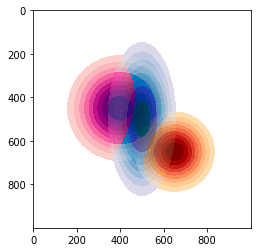

In [17]:
plt.imshow(mixed_ddhp_color)

In [18]:
width = 18.5
height = 18.5
plt.rcParams['figure.figsize'] = [width, height]
# plt.rcParams['xtick.labelsize'] = 15
# plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.handlelength'] = 2
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 25

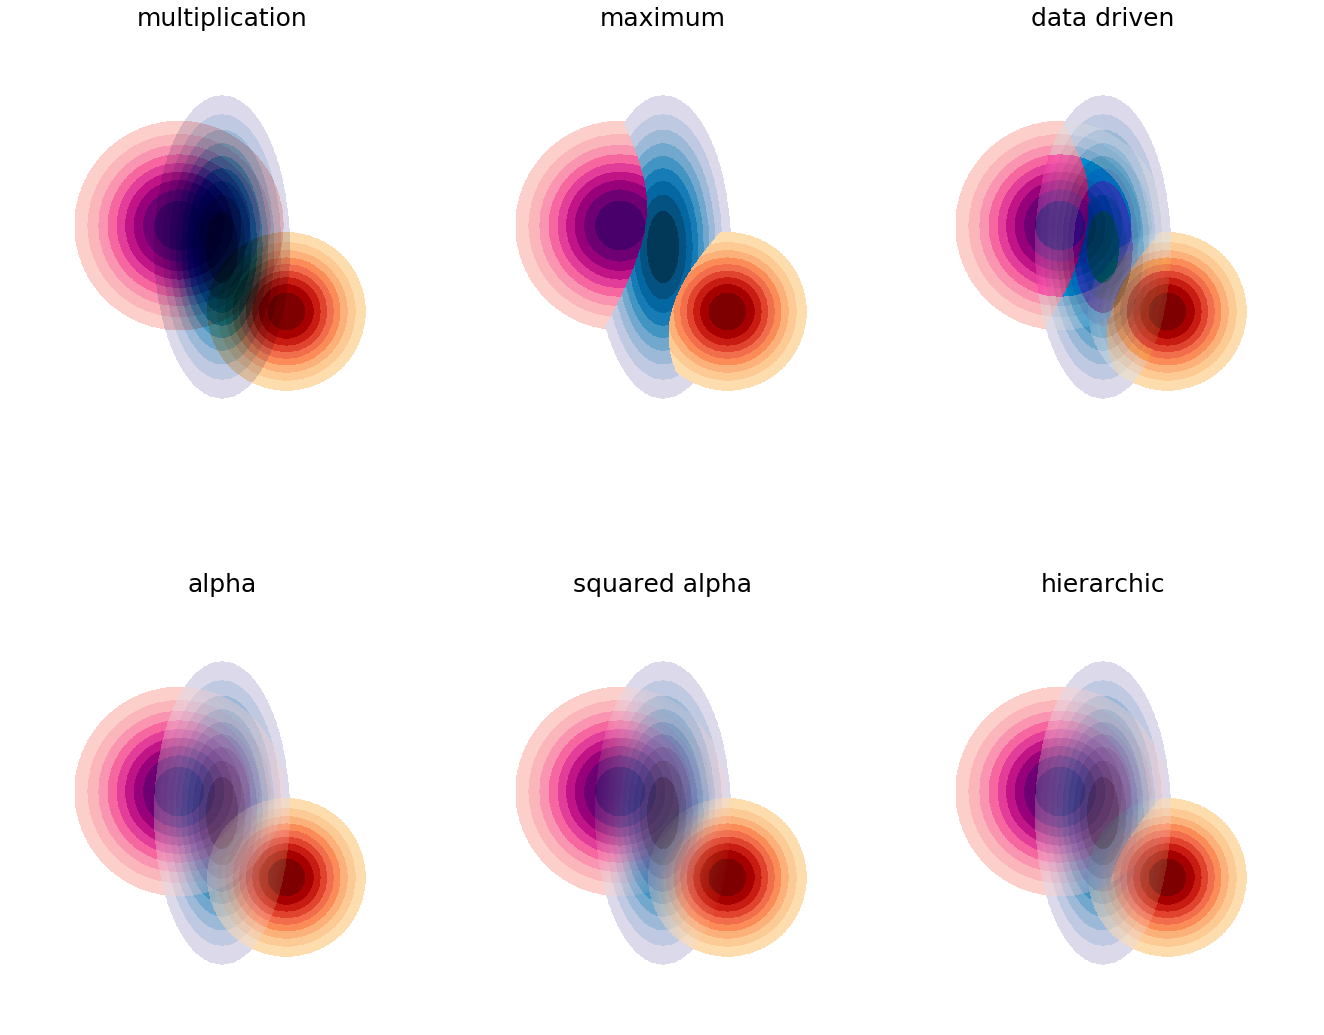

In [19]:
#displays an image
fig, ([ax_0, ax_1, ax_2], [ax_3, ax_4, ax_5]) = plt.subplots(2,3)
#, ax_1, ax_2, ax_3
ax_0.imshow(mixed_rgb)
ax_0.axis("off")
ax_0.set_title("multiplication")
ax_1.imshow(mixed_rgb_max)
ax_1.axis("off")
ax_1.set_title("maximum")
ax_2.imshow(mixed_ddhp_color)
ax_2.axis("off")
ax_2.set_title("data driven")
ax_3.imshow(mixed_rgb_alpha)
ax_3.axis("off")
ax_3.set_title("alpha")
ax_4.imshow(mixed_alpha_quad)
ax_4.axis("off")
ax_4.set_title("squared alpha")
ax_5.imshow(mixed_hierarchic)
ax_5.axis("off")
ax_5.set_title("hierarchic")
plt.subplots_adjust(0, 0, 1, 1)
plt.tight_layout()
plt.savefig("mixing_operator.png", format="png")
plt.show()